<a href="https://colab.research.google.com/github/Vamsi995/Paraphrase-Generator/blob/master/Tranformers_Hugginface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformers** 

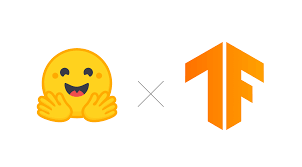

## **1. Overview**

> ### **1.1 Introduction**

> The year 2018 has been an inflection point for machine learning models handling text (or more accurately, Natural Language Processing or NLP for short). Our conceptual understanding of how best to represent words and sentences in a way that best captures underlying meanings and relationships is rapidly evolving. Moreover, the NLP community has been putting forward incredibly powerful components that you can freely download and use in your own models and pipelines. Transfer learning, particularly models like Allen AI's ELMO, OpenAI's Open-GPT, and Google's BERT allowed researchers to smash multiple benchmarks with minimal task-specific fine-tuning and provided the rest of the NLP community with pretrained models that could easily (with less data and less compute time) be fine-tuned and implemented to produce state of the art results.

## **2. Models Before Transformers**
In order to understand how transformers work we need to have some background on the previous breakthroughs which led to its invention. The transformers are built over attention mechanism and the encoder-decoder model, hence there are no recurrent units in the transformer model and you can completely skip learning about RNN although it is better to read about it for better understanding.

![](https://lh3.googleusercontent.com/proxy/5xJhduPWUaJJ2x4rLhRzJO3wz4pN0uHlOPpc0FzoMXmuDP-pdmpIwyhBAOWPnV4GuMNUfFIV17UPtKLB0eKhZ4h8jpYVlV-5sCx7ZcmR0BY)



> ### **2.1 RNN's & LSTM's**

> Back to 2017, most of the people using Neural Networks when working on Natural Language Processing were relying on 
sequential processing of the input through [Recurrent Neural Network (RNN)](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) and [Long Short Term Memory (LSTM)](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

![rnn](http://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-general.png)   

> RNNs were performing well on large variety of tasks involving sequential dependency over the input sequence. 
However, this sequentially-dependent process had issues modeling very long range dependencies and 
was not well suited for the kind of hardware we're currently leveraging due to bad parallelization capabilities. 

> Some extensions were provided by the academic community, such as Bidirectional RNN ([Schuster & Paliwal., 1997](https://www.researchgate.net/publication/3316656_Bidirectional_recurrent_neural_networks), [Graves & al., 2005](https://mediatum.ub.tum.de/doc/1290195/file.pdf)), 
which can be seen as a concatenation of two sequential process, one going forward, the other one going backward over the sequence input.

![birnn](https://miro.medium.com/max/764/1*6QnPUSv_t9BY9Fv8_aLb-Q.png)


> Short Comings: 
1. Vanishing Gradient Problem of RNN's.
2. Even the LSTM's have long term dependency issues with corpus of large text.
3. Each NLP task needed a specific stand-alone model.
4. Transfer learning is not as flexible as that of CNN's where only the last classifier layer has to be trained. 
There are implementations where transfer learning was done. For reference [Efficient Transfer Learning Schemes for Personalized Language Modeling using Recurrent Neural Network](https://arxiv.org/abs/1701.03578), [Generative Knowledge Transfer for Neural Language Model](https://arxiv.org/abs/1608.04077) 




> ### **2.2 Word Embeddings**

> For words to be processed by machine learning models, they need some form of numeric representation that models can use in their calculation. Word2Vec showed that we can use a vector (a list of numbers) to properly represent words in a way that captures semantic or meaning-related relationships (e.g. the ability to tell if words are similar, or opposites, or that a pair of words like “Stockholm” and “Sweden” have the same relationship between them as “Cairo” and “Egypt” have between them) as well as syntactic, or grammar-based, relationships (e.g. the relationship between “had” and “has” is the same as that between “was” and “is”).

> The field quickly realized it’s a great idea to use embeddings that were pre-trained on vast amounts of text data instead of training them alongside the model on what was frequently a small dataset. So it became possible to download a list of words and their embeddings generated by pre-training with Word2Vec or GloVe. This is an example of the GloVe embedding of the word “stick” (with an embedding vector size of 200).

![GloVe](http://jalammar.github.io/images/glove-embedding.png)


> ### **2.3 Contextualized Word Embeddings**

> If we’re using this GloVe representation, then the word “stick” would be represented by this vector no-matter what the context was. “Wait a minute” said a number of NLP researchers ([Peters et. al., 2017](https://arxiv.org/abs/1705.00108), [McCann et. al., 2017](https://arxiv.org/abs/1708.00107), and yet again [Peters et. al., 2018](https://arxiv.org/pdf/1802.05365.pdf) in the ELMo paper ), “stick”” has multiple meanings depending on where it’s used. Why not give it an embedding based on the context it’s used in – to both capture the word meaning in that context as well as other contextual information?”. And so, contextualized word-embeddings were born.

> Instead of using a fixed embedding for each word, ELMo looks at the entire sentence before assigning each word in it an embedding. It uses a bi-directional LSTM trained on a specific task to be able to create those embeddings.

> ELMo provided a significant step towards pre-training in the context of NLP. The ELMo LSTM would be trained on a massive dataset in the language of our dataset, and then we can use it as a component in other models that need to handle language.

What’s ELMo’s secret?

> ELMo gained its language understanding from being trained to predict the next word in a sequence of words - a task called Language Modeling. This is convenient because we have vast amounts of text data that such a model can learn from without needing labels.

![ELMo](http://jalammar.github.io/images/Bert-language-modeling.png)

*A step in the pre-training process of ELMo: Given “Let’s stick to” as input, predict the next most likely word – a language modeling task. When trained on a large dataset, the model starts to pick up on language patterns. It’s unlikely it’ll accurately guess the next word in this example. More realistically, after a word such as “hang”, it will assign a higher probability to a word like “out” (to spell “hang out”) than to “camera”.*


> We can see the hidden state of each unrolled-LSTM step peaking out from behind ELMo’s head. Those come in handy in the embedding process after this pre-training is done.

> ELMo actually goes a step further and trains a bi-directional LSTM – so that its language model doesn’t only have a sense of the next word, but also the previous word.

![](http://jalammar.github.io/images/elmo-forward-backward-language-model-embedding.png)![alt text](![alt text](https://))

> ELMo comes up with the contextualized embedding through grouping together the hidden states (and initial embedding) in a certain way (concatenation followed by weighted summation).

![](http://jalammar.github.io/images/elmo-embedding.png)

> ULM-FiT introduced methods to effectively utilize a lot of what the model learns during pre-training – more than just embeddings, and more than contextualized embeddings. ULM-FiT introduced a language model and a process to effectively fine-tune that language model for various tasks.

> NLP finally had a way to do transfer learning probably as well as Computer Vision could.



> ### **2.3 Seq2Seq Models (Encoder-Decoder)**

> Sequence-to-sequence models are deep learning models that have achieved a lot of success in tasks like machine translation, text summarization, and image captioning. Google Translate started using such a model in production in late 2016. These models are explained in the two pioneering papers ([Sutskever et al., 2014, Cho et al., 2014](https://papers.nips.cc/paper/5346-sequence-to-sequence-learning-with-neural-networks.pdf)).
A sequence-to-sequence model is a model that takes a sequence of items (words, letters, features of an images…etc) and outputs another sequence of items.

![](https://miro.medium.com/max/1400/1*1JcHGUU7rFgtXC_mydUA_Q.jpeg)



> The model consists of 3 parts: encoder, intermediate (encoder) vector and decoder.

1. Encoder:
A stack of several recurrent units (LSTM or GRU cells for better performance) where each accepts a single element of the input sequence, collects information for that element and propagates it forward.
In question-answering problem, the input sequence is a collection of all words from the question. Each word is represented as x_i where i is the order of that word.
The hidden states h_i are computed using the formula:
![](https://miro.medium.com/max/1400/1*sKqGIDJm3P8DeSwl0WHGkg.png)
> This simple formula represents the result of an ordinary recurrent neural network. As you can see, we just apply the appropriate weights to the previous hidden state h_(t-1) and the input vector x_t.

2. Encoder Vector:
This is the final hidden state produced from the encoder part of the model. It is calculated using the formula above.
This vector aims to encapsulate the information for all input elements in order to help the decoder make accurate predictions.
It acts as the initial hidden state of the decoder part of the model.

3. Decoder:
A stack of several recurrent units where each predicts an output y_t at a time step t.
Each recurrent unit accepts a hidden state from the previous unit and produces and output as well as its own hidden state.
In the question-answering problem, the output sequence is a collection of all words from the answer. Each word is represented as y_i where i is the order of that word.
Any hidden state h_i is computed using the formula:

![](https://miro.medium.com/max/1400/1*sdxvcjeV7NOUsR_VQ_nrUQ.png)

> As you can see, we are just using the previous hidden state to compute the next one.
The output y_t at time step t is computed using the formula:
![](https://miro.medium.com/max/1400/1*y5T2-J2mrCRZp5M9Q4METw.png)
> We calculate the outputs using the hidden state at the current time step together with the respective weight W(S). Softmax is used to create a probability vector which will help us determine the final output (e.g. word in the question-answering problem).
The power of this model lies in the fact that it can map sequences of different lengths to each other. As you can see the inputs and outputs are not correlated and their lengths can differ. This opens a whole new range of problems which can now be solved using such architecture.


If you want a deeper visual understanding of seq2seq models I suggest you to go through this blog post - [Visualizing Neural Machine Translation](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/).


> ### **2.4 With Attention Mechanism**

> A potential issue with this encoder–decoder approach is that a neural network needs to be able to compress all the necessary information of a source sentence into a fixed-length vector. This may make it difficult for the neural network to cope with long sentences, especially those that are longer than the sentences in the training corpus.





![](https://cdn-images-1.medium.com/max/1000/1*XSDr2OcMBYmnOf351KBRpg.jpeg)



> The attention mechanism is located between the encoder and the decoder, its input is composed of the encoder’s output vectors h1, h2, h3… and the states of the decoder s1, s2, s3… the attention’s output is a sequence of vectors called context vectors denoted by c1, c2, c3… . The attention mechanism, notice that the input is composed of the encoder’s output h1, h2, h3… and the decoder’s states s1, s2, s3…


> Context vectors:
The context vectors enable the decoder to focus on certain parts of the input when predicting its output. Each context vector is a weighted sum of the the encoder’s output vectors h1, h2, h3… each vector hi contains information about the whole input sequence (since it has access to the encoder states during its computation) with a strong focus on the parts surrounding the i-th vector of the input sequence. The vectors h1, h2, h3… are scaled by weights ɑij capturing the degree of relevance of input vector xj to output at time i, yi.

> The context vectors c1, c2, c3… are given by:
![](https://cdn-images-1.medium.com/freeze/max/1000/1*w35I5o4-SPBFD3_d9N9Ciw.jpeg?q=20)

> The weights ɑij are learned using an additional fully-connected shallow network, denoted by fc, this is where the s1, s2, s3… part of the input comes into play. Computation of the attention weights is given by:

![](https://cdn-images-1.medium.com/freeze/max/1000/1*e33LuC0b8HUcmp_Zl0TS7A.jpeg?q=20)



> As can be seen in the image below, the fully-connected network recieves the concatenation of vectors [si-1,hi] as input at time step i. The network has a single fully-connected linear layer, the outputs of the layer ,denoted by eij, are passed through a softmax function computing our αij weights, which lie in [0,1].

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Example-of-Attention.png)

> Notice that we are using the same fully-connected network for all the concatenated pairs [s0,h1], [s1,h2], [s2,h3]… meaning there is a single network learning the attention αij weights.


![](https://cdn-images-1.medium.com/freeze/max/1000/1*8eiGDosDMamFSoQficlSiw.jpeg?q=20)


For a deeper understanding I suggest you to watch these videos:

1. [Attention Model Intuition](https://www.youtube.com/watch?v=SysgYptB198).
2. [Attention Model](https://www.youtube.com/watch?v=quoGRI-1l0A).



## **3. Transformers: The New State of the Art**

The Transformers era originally started from the work of [Vaswani & al., 2017](https://arxiv.org/abs/1706.03762) who demonstrated its superiority over Recurrent Neural Network (RNN) on translation tasks but it quickly extended to almost all the tasks RNNs were State-of-the-Art at that time.

One advantage of Transformer over its RNN counterpart was its non sequential attention model. Remember, the RNNs had to iterate over each element of the input sequence one-by-one and carry an "updatable-state" between each hop. With Transformer, the model is able to look at every position in the sequence, at the same time, in one operation.


![transformer-encoder-decoder](https://nlp.seas.harvard.edu/images/the-annotated-transformer_14_0.png)




To understand this model quite intuitively head over to this [blog post](https://jalammar.github.io/illustrated-transformer/).


### **Deconstructing Transformers**


Let us consider language translation as our example. A typical transformer model is made of stacks of encoders and decoders.


![](https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png)


Each of the  encoder and decoder modules are made of different sub layers.

![](https://jalammar.github.io/images/t/Transformer_decoder.png)


1. Inputs:

The input sequence has to be tokenized and should be converted into their corresponding embeddings using an embedding algorithm and should be passed into the bottom most encoder. 

The abstraction that is common to all the encoders is that they receive a list of vectors each of the size 512(in case of bert model). In the bottom encoder that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below. The size of this list is hyperparameter that can be fine tuned. Usually its the size of the longest sentence in our training dataset.

After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder.

![](https://jalammar.github.io/images/t/encoder_with_tensors.png)




2. **Encoders**

> **Self Attention**

>> **What is self attention?**

   Consider the following sentence: 

      "The king has praised the villager because he finished his chores."

What does he in this sentence refer to, the king or the villager. Here self attention solves this problem for us by associating "he" to the villager. This is also called coreference resolution. 


>> **Self Attention Layer**

1. Three vectors have to be made for each of the encoder's input vectors (in this case, the embedding of each word). For each word, we create a Query vector (Q), Key vector (K), and Value vector (V). These vectores are produced by multiplying them with three weight matrices which are trained during the process of training. 

![](https://jalammar.github.io/images/t/transformer_self_attention_vectors.png)



2. The self attention mechanism lets each word see every other word and creates a score for each of these words that indicates the relevance of each word to every other word. Say we’re calculating the self-attention for the first word in this example, “Thinking”. We need to score each word of the input sentence against this word. The score determines how much relevance to place on other words of the input sentence as we encode a word at a certain position. The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.


3. Softmax normalizes the scores so they’re all positive and add up to 1. Multiply each value vector by the softmax score (in preparation to sum them up). This gives a probability distribution over the keys which are peaked at the ones that are similar to the query. The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example). Sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

![](https://jalammar.github.io/images/t/self-attention-output.png)


>> **Multiheaded Attention**

It gives the attention layer multiple “representation subspaces”. As we’ll see next, with multi-headed attention we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder). Each of these sets is randomly initialized. Then, after training, each set is used to project the input embeddings (or vectors from lower encoders/decoders) into a different representation subspace.


![](https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png)


>> **Positional Encoding**

Since we are passing all the inputs at once the transformer loses the notion of position during encoding. To solve this the transformer adds a special vector to each of the embedded input vectors. During training the model learns these positional dependencies which helps is to determine the position of each word and hence provides meaningful distances between encoding vectors once they are projected into  Q/K/V vectors.

![](https://jalammar.github.io/images/t/transformer_positional_encoding_example.png)


3. **Decoders** 

The encoder outputs a set of attention vectors K and V out of it and it provides and passes it on to each of the decoder. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence:

![](https://i.stack.imgur.com/SPNEP.png)


Each from the decoder is then passed into the bottom most decoder and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word. These steps are repeated until the decoder outputs a special symbol indicating the transformer that the process is complete.

In the decoder, the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation. I suggest you to go through this blog to better understand the masking mechanism in the decoders self attention layer. 

[Masking in Transformers’ self-attention mechanism](https://medium.com/analytics-vidhya/masking-in-transformers-self-attention-mechanism-bad3c9ec235c)



4. **Linear Layer**

The linear layers job is to convert the output of the decoder which is a vector of some size, into a word. The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would make the logits vector 10,000 cells wide – each cell corresponding to the score of a unique word. That is how we interpret the output of the model followed by the Linear layer.

The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.


![](https://jalammar.github.io/images/t/output_target_probability_distributions.png)


Now, because the model produces the outputs one at a time, we can assume that the model is selecting the word with the highest probability from that probability distribution and throwing away the rest. That’s one way to do it (called **greedy decoding**). Another way to do it would be to hold on to, say, the top two words (say, ‘I’ and ‘a’ for example), then in the next step, run the model twice: once assuming the first output position was the word ‘I’, and another time assuming the first output position was the word ‘a’, and whichever version produced less error considering both positions #1 and #2 is kept. We repeat this for positions #2 and #3…etc. This method is called “**beam search**”, where in our example, beam_size was two (meaning that at all times, two partial hypotheses (unfinished translations) are kept in memory), and top_beams is also two (meaning we’ll return two translations). These are both hyperparameters that you can experiment with.





> Must watch animation for better understanding in the Google blog post: [Transformer: A Novel Neural Network Architecture for Language Understanding](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)






## Bert Model

BERT (Bidirectional Encoder Representations from Transformers), released in late 2018, is the model we will use in this tutorial to provide readers with a better understanding of and practical guidance for using transfer learning models in NLP. BERT is a method of pretraining language representations that was used to create models that NLP practicioners can then download and use for free. You can either use these models to extract high quality language features from your text data, or you can fine-tune these models on a specific task (classification, entity recognition, question answering, etc.) with your own data to produce state of the art predictions.


BERT builds on top of a number of clever ideas that have been bubbling up in the NLP community recently – including but not limited to Semi-supervised Sequence Learning (by Andrew Dai and Quoc Le), ELMo (by Matthew Peters and researchers from AI2 and UW CSE), ULMFiT (by fast.ai founder Jeremy Howard and Sebastian Ruder), the OpenAI transformer (by OpenAI researchers Radford, Narasimhan, Salimans, and Sutskever), and the Transformer (Vaswani et al).

![](http://jalammar.github.io/images/bert-transfer-learning.png)

The paper presents two model sizes for BERT:

1. BERT BASE – Comparable in size to the OpenAI Transformer in order to compare performance.
2. BERT LARGE – A ridiculously huge model which achieved the state of the art results reported in the paper
3. BERT is basically a trained Transformer Encoder stack i.e BERT does not have any decoders but it consists of only the encoder stack.


Both BERT model sizes have a large number of encoder layers (which the paper calls Transformer Blocks) – twelve for the Base version, and twenty four for the Large version. These also have larger feedforward-networks (768 and 1024 hidden units respectively), and more attention heads (12 and 16 respectively) than the default configuration in the reference implementation of the Transformer in the initial paper (6 encoder layers, 512 hidden units, and 8 attention heads).

> **Inputs**

![Illustration of CLS token purpose](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)


> The first input token is supplied with a special [CLS] token for reasons that will become apparent later on. CLS here stands for Classification. Just like the vanilla encoder of the transformer, BERT takes a sequence of words as input which keep flowing up the stack. Each layer applies self-attention, and passes its results through a feed-forward network, and then hands it off to the next encoder.


> **Output**

> Each position outputs a vector of size hidden_size (768 in BERT Base). We focus on the output of only the first position (that we passed the special [CLS] token to). That vector can now be used as the input for a classifier of our choosing. The paper achieves great results by just using a single-layer neural network as the classifier. If you have more labels (for example if you’re an email service that tags emails with “spam”, “not spam”, “social”, and “promotion”), you just tweak the classifier network to have more output neurons that then pass through softmax.

> The output from the bert model is nothing but feature extraction. The final vector output from the bert model represents a new embedding of the input sentence with more semantic meaning over the context. In fact this process happens over each encoder. Each encoder tries to change these embedded vector positions into new ones which have more semantic meaning with respect to the context.

> The CLS token tries to capture the information regarding the entire sentence as a whole.


> **Task Specific Tuning**

![Task Specific Models](http://jalammar.github.io/images/bert-tasks.png)


If you want to dive into the deeper intricacies in this model I suggest that you go through the reasearch series by [Chris McMormick](https://www.youtube.com/playlist?list=PLam9sigHPGwOBuH4_4fr-XvDbe5uneaf6).


## **HuggingFace Tranformers Library**

The transformers library is an open-source, community-based repository to train, use and share models based on the Transformer architecture [Vaswani & al., 2017](https://arxiv.org/abs/1706.03762) such as Bert [Devlin & al., 2018](https://arxiv.org/abs/1810.04805), Roberta [Liu & al., 2019](https://arxiv.org/abs/1907.11692), GPT2 [Radford & al., 2019](), XLNet [Yang & al., 2019](), etc.

Along with the models, the library contains multiple variations of each of them for a large variety of downstream-tasks like Named Entity Recognition (NER), Sentiment Analysis, Language Modeling, Question Answering and so on.

The library builds on three main classes: a configuration class, a tokenizer class, and a model class.
1. **Configuration class**: 
  The configuration class contains some of the hyperparameters of the model like the number of layers, number of attention heads etc...,. We can also configure this to output all the hidden states and attentions from each layer. Below is the config of Distilbert model. 


        from transformers import DistilBertConfig

        print(DistilBertConfig())

        DistilBertConfig {
          "activation": "gelu",
          "attention_dropout": 0.1,
          "dim": 768,
          "dropout": 0.1,
          "hidden_dim": 3072,
          "initializer_range": 0.02,
          "max_position_embeddings": 512,
          "model_type": "distilbert",
          "n_heads": 12,
          "n_layers": 6,
          "pad_token_id": 0,
          "qa_dropout": 0.1,
          "seq_classif_dropout": 0.2,
          "sinusoidal_pos_embds": false,
          "vocab_size": 30522
        }




2. **Tokenizer Class**: The tokenizer class is responsible for converting the text into tokens which are later converted into word embeddings by the model. This tokenization varies according to the model, therefore each model has its own tokenizer.

3. **Model Class**: The model class holds the neural network modeling logic itself. When using a TensorFlow model, it inherits from tf.keras.layers.Layer which means it can be used very simply by the Keras’ fit API or trained using a custom training loop and GradientTape .







## **Quick Start**

### **Installation**





In [ ]:
# With pip
!pip install transformers

# From source
# git clone https://github.com/huggingface/transformers.git
# cd transformers 
# pip install .


     |████████████████████████████████| 757kB 9.4MB/s 
     |████████████████████████████████| 3.0MB 29.3MB/s 
     |████████████████████████████████| 1.1MB 58.4MB/s 
     |████████████████████████████████| 890kB 56.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=ad5414e39f20db559234e60d1b4e9b49833d055a34450362bc8efce07ebf008f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### **Basic Terminology**

Similar to the RNN and LSTM models the transformer model also takes in tokenized input but unlike them it takes the input at once rather than sequentially. Every transformer model is different as they have different configurations but one thing they have in common is that they take inputs in the same way. So let us understand how to provide inputs to these models.



#### **Input ID's**

Here we will be using tokenizer class to understand what these Input ID's are. Do note that every transformer model has a unique tokenizer which takes different parameters but produces these Input ID's which are fed into the transformer model. Each word in given a unique ID (Input ID) which distinguishes that word from the rest.

In [ ]:
#@title Default title text
from transformers import BertTokenizer

# Here Bert is a transformer model. And we are using Bert's tokenizer.

# from_pretrained() here instantiates a pretrained tokenizer.
# Here "bert-base-uncased" is the models name.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# print(len(tokenizer.vocab.keys()))
input_text = "Hey I am an input text."

# Splitting the sentence into words
tokens = tokenizer.tokenize(input_text)
print(f"Tokens: {tokens}")

#Converts tokens into ID's
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f"Input ID's: {input_ids}")

# In case you want the tokens back from input_ids in an array
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(f"Tokens from Input ID's: {tokens}")

print()

# Instead of doing these two steps we can reduce it to one using the encode() or encode_plus() functions
input_ids = tokenizer.encode(input_text)
print(f"Input ID's with encode: {input_ids}")

# We can see that some additional tokens have been added when we used encode(). These are special tokens and are specific to the model's tokenizer. And this is one of the reason why tokenizer is unique to each model. And one other reason is that each model has a different vocabulary set.

# We can see what these additional tokens are using the decode() function
tokens = tokenizer.decode(input_ids)
print(f"Decoded tokens: {tokens}")
print(type(tokens))
# Do note that decode gives a string instance

# In this case [CLS] and [SEP] tokens are specific to the BERT model and we will discuss this in the pretrained models section.

# In case you want the tokens back from input_ids in an array
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(f"Tokens from Input ID's: {tokens}")



Tokens: ['hey', 'i', 'am', 'an', 'input', 'text', '.']
Input ID's: [4931, 1045, 2572, 2019, 7953, 3793, 1012]
Tokens from Input ID's: ['hey', 'i', 'am', 'an', 'input', 'text', '.']

Input ID's with encode: [101, 4931, 1045, 2572, 2019, 7953, 3793, 1012, 102]
Decoded tokens: [CLS] hey i am an input text. [SEP]
<class 'str'>
Tokens from Input ID's: ['[CLS]', 'hey', 'i', 'am', 'an', 'input', 'text', '.', '[SEP]']


#### **Attention masks**


The attention mask is an optional argument used when batching sequences together. This argument indicates to the model which tokens should be attended to, and which should not.

A transformer takes a fixed size of input i.e for example BERT model takes a maximum of 512 tokens as its input. Incase we have inputs having unequal numbers of tokens they have to be padded to be of the same size so that they can be passed as inputs. The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them. For the BertTokenizer, 1 indicate a value that should be attended to while 0 indicate a padded value.

In [ ]:
from transformers import BertTokenizer

# Here Bert is a transformer model.

# from_pretrained() here instantiates a pretrained tokenizer.
# Here "bert-base-uncased" is the models name - we will see this in the pretrained models section.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

long_text = "Hey I am the input text."
short_text = "This is short."

input_ids_1 = tokenizer.encode(long_text)
input_ids_2 = tokenizer.encode(short_text)

print(f"input_ids_1: {input_ids_1}, length={len(input_ids_1)}")
print(f"input_ids_2: {input_ids_2}, length={len(input_ids_2)}")

# We can see that we have to pad input_ids_2 to make it to a length of 9.
input_ids_2 = tokenizer.encode(short_text,max_length=9, pad_to_max_length=True)
print(f"input_ids_2: {input_ids_2}, length={len(input_ids_2)}")

attention_mask=[]
for i in input_ids_2:
  if (i != 0 ):
      attention_mask.append(1)
  else:
    attention_mask.append(0)
print(f"Attention Mask: {attention_mask}")

print()

# In order to obtain the attention masks the simplest way is to use encode_plus()
input_dict = tokenizer.encode_plus(short_text,max_length=9, pad_to_max_length=True)
print(f"encode_plus() output: {input_dict}")

input_ids_2 = input_dict["input_ids"]
print(f"input_ids_2: {input_ids_2}, length={len(input_ids_2)}")
attention_mask = input_dict["attention_mask"]
print(f"Attention Mask: {attention_mask}")

input_ids_1: [101, 4931, 1045, 2572, 1996, 7953, 3793, 1012, 102], length=9
input_ids_2: [101, 2023, 2003, 2460, 1012, 102], length=6
input_ids_2: [101, 2023, 2003, 2460, 1012, 102, 0, 0, 0], length=9
Attention Mask: [1, 1, 1, 1, 1, 1, 0, 0, 0]

encode_plus() output: {'input_ids': [101, 2023, 2003, 2460, 1012, 102, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 0, 0, 0]}
input_ids_2: [101, 2023, 2003, 2460, 1012, 102, 0, 0, 0], length=9
Attention Mask: [1, 1, 1, 1, 1, 1, 0, 0, 0]


#### **Token Type ID's**

Some models’ purpose is to do sequence classification or question answering. These require two different sequences to be encoded in the same input IDs. The Token Type IDs are a binary mask identifying the different sequences in the model.

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

input_text_1 = "Hey this is the first sequence"
input_text_2 = "This is the second text"

input_dict = tokenizer.encode_plus(input_text_1,input_text_2)
print(f"encode_plus() output: {input_dict}")

print()

input_ids = input_dict["input_ids"]
print(f"input_ids_2: {input_ids_2}")

decoded_sentence = tokenizer.convert_ids_to_tokens(input_ids)
print(f"Tokens: {decoded_sentence}")

# We can see here that 0's represent one input sentence and 1's represent the other input sentence
token_type_ids = input_dict["token_type_ids"]
print(f"token_type_ids: {token_type_ids}")

encode_plus() output: {'input_ids': [101, 4931, 2023, 2003, 1996, 2034, 5537, 102, 2023, 2003, 1996, 2117, 3793, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

input_ids_2: [101, 2023, 2003, 2460, 1012, 102, 0, 0, 0]
Tokens: ['[CLS]', 'hey', 'this', 'is', 'the', 'first', 'sequence', '[SEP]', 'this', 'is', 'the', 'second', 'text', '[SEP]']
token_type_ids: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


### More on tokenizer

https://colab.research.google.com/drive/19sODZkJ7WATbJkrZbb_aVcDUvM-fsPiL#scrollTo=31S_PltdDw9L&line=24&uniqifier=1


## **Using a Model**

I will be using DistilBert to demonstrate the models as going through all the models is quite cumbersome. DistilBert is a toned down version(lesser trainable parameters) of Bert model but with almost same accuracy. So let us explore the [distilbert model](https://huggingface.co/transformers/model_doc/distilbert.html).

DistilBert has four pretrained models for specific task in this library:
1. TFDistilBertModel
2. TFDistilBertForMaskedLM
3. TFDistilBertForSequenceClassification
4. TFDistilBertForQuestionAnswering

Note that the "TF" prefix infront of each model is to tell the library that we want a Tensorflow model. If we want a PyTorch model simply omit TF infront of model names.

In the above list each model has the TFDistilBert model in it with some additional tweaks in input or output. For example the TFDistilBertForSequenceClassification has a classification layer at the output of the distilbert model and also the inputs are in such a way that special tokens are added to it. 


We have two methods to implement any of these models. 
1. Pipeline
2. Defining our own model


### **Pipeline**
The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.

Pipeline workflow is defined as a sequence of the following operations:

Input -> Tokenization -> Model Inference -> Post-Processing (Task dependent) -> Output



In [ ]:
from transformers import pipeline

# Sequence Classification
sequence_classifier = pipeline("sentiment-analysis")

result = sequence_classifier("I am really smart and this is not positive")
print(result)


result = sequence_classifier("I like not being lazy when i dont have a lot of work")
print(result)





[{'label': 'NEGATIVE', 'score': 0.9946390390396118}]
[{'label': 'POSITIVE', 'score': 0.9947696924209595}]


In [ ]:
from transformers import pipeline

masked_lm = pipeline("fill-mask")
print(masked_lm(f"This is big {masked_lm.tokenizer.mask_token} that never sleeps."))


[{'sequence': '<s> This is big sleep that never sleeps.</s>', 'score': 0.07665348052978516, 'token': 3581}, {'sequence': '<s> This is big fish that never sleeps.</s>', 'score': 0.05561108887195587, 'token': 3539}, {'sequence': '<s> This is big business that never sleeps.</s>', 'score': 0.04515586793422699, 'token': 265}, {'sequence': '<s> This is big beast that never sleeps.</s>', 'score': 0.03939582780003548, 'token': 22067}, {'sequence': '<s> This is big stuff that never sleeps.</s>', 'score': 0.02077295631170273, 'token': 2682}]


### **Defining our own model**

Workflow: Tokenizer definition → Model Definition → Model Training → Inference

Since the pipeline method doesnt allow for any customizations this is more preffered. 

#### **Tokenizer Definition**

In [ ]:
from transformers import DistilBertTokenizer
import tensorflow as tf
import numpy as np

# Initializing the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


# Function for tokenizing the input 
def tokenize(sentences, tokenizer):

  # Stores all the input ids
  input_ids = []

  # Stores all the attention masks
  attention_mask = []

  for sentence in sentences:
    #encoding all the inputs
    inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=128, pad_to_max_length=True,return_tensors="tf")

    input_ids.append(inputs["input_ids"])
    attention_mask.append(inputs["attention_mask"])
  

  # transforming into an appropriate shape
  features = np.asarray(input_ids,dtype='int32')
  masks = np.asarray(attention_mask,dtype="int32")

  print(features.shape,masks.shape)


  # print(tokenizer.convert_ids_to_tokens(features[0,:,:].flatten()))
  return features, masks


In [ ]:
# Contains the vertical stack of encoded sentences
input_tensor = tokenize(["I was really happy yesterday"],tokenizer)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.


(1, 1, 128) (1, 1, 128)


#### **Model Definition**

[Sequential API vs Functional API](https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e)

##### **Using Sequential API of keras**

In [ ]:
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig

# DistilBertConfig is the config of the Model
# By default TFDistilBertForSequenceClassification has two output labels
config = DistilBertConfig(
    num_labels = 2
)

config.output_hidden_states = False
# print(config)

# labels for the classification
labels = ["positive","negative"]

# model instantiation
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",config=config)

print(model.summary())

Model: "tf_distil_bert_for_sequence_classification_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  1538      
_________________________________________________________________
dropout_199 (Dropout)        multiple                  0         
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
[input_tensor[0].reshape((1,128)), input_tensor[1].reshape((1,128))]

[array([[ 101, 1045, 2001, 2428, 3407, 7483,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]], dtype=int32),
 array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# model results are always a tuple 
# foward pass through the model
model_output = model([input_tensor[0].reshape((1,128)), input_tensor[1].reshape((1,128))])[0]
print(model_output)

tf.Tensor([[ 0.00032082 -0.0713167 ]], shape=(1, 2), dtype=float32)


In [ ]:
# applying softmax to the output
classification_result = tf.nn.softmax(model_output, axis=1).numpy()[0]

index = classification_result.argmax()

print(labels[index])


positive


##### **Using Functional API of keras**

In [ ]:
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig

config = DistilBertConfig(
    num_labels = 2
)
config.output_hidden_states = False
# print(config)

labels = ["positive","negative"]

model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",config=config)

input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')

model_output = model([input_ids, input_masks_ids])

model = tf.keras.Model(inputs=[input_ids, input_masks_ids], outputs = model_output)

print(model.summary())

In [ ]:
input_ids_tensor = tokenize(["this is it"],tokenizer)[0]
input_mask_tensor = tokenize(["this is it"],tokenizer)[1]
print()
model.predict([input_ids_tensor.reshape((1,128)),input_mask_tensor.reshape((1,128))])

## **Pretrained Models**

Head to the [docs](https://huggingface.co/transformers/v1.1.0/pretrained_models.html).


There is a lot of transformer-based language models. The most successful ones are (as of April 2020)

1. Transformer (Google Brain/Research)
2. BERT (Google Research)
3. GPT-2 (OpenAI)
4. XLNet (Google Brain)
5. CTRL (SalesForce)
6. Megatron (NVidia)
7. Turing-NLG (Microsoft)

## **Training & Fine-Tuning the Models**


1. **Quicker Development**

    * First, the pre-trained BERT model weights already encode a lot of information about our language. As a result, it takes much less time to train our fine-tuned model - it is as if we have already trained the bottom layers of our network extensively and only need to gently tune them while using their output as features for our classification task. In fact, the authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours needed to train the original BERT model or a LSTM from scratch!). 

2. **Less Data**

    * In addition and perhaps just as important, because of the pre-trained weights this method allows us to fine-tune our task on a much smaller dataset than would be required in a model that is built from scratch. A major drawback of NLP models built from scratch is that we often need a prohibitively large dataset in order to train our network to reasonable accuracy, meaning a lot of time and energy had to be put into dataset creation. By fine-tuning BERT, we are now able to get away with training a model to good performance on a much smaller amount of training data.

3. **Better Results**

    * Finally, this simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) was shown to achieve state of the art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question answering, etc. Rather than implementing custom and sometimes-obscure architetures shown to work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.




#### **Without TFTrainer Class**

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import tensorflow_datasets as tfds

# loading the imdb dataset
(ds_train,ds_test), ds_info = tfds.load('imdb_reviews',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised = True,
    with_info = True      
)

print('info', ds_info)



INFO:absl:No config specified, defaulting to first: imdb_reviews/plain_text
INFO:absl:Overwrite dataset info from restored data version.
INFO:absl:Reusing dataset imdb_reviews (/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0)
INFO:absl:Constructing tf.data.Dataset for split (NamedSplit('train'), NamedSplit('test')), from /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0


info tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning

In [ ]:
# Viewing the dataset

print(tfds.as_numpy(ds_train.take(1)))

for review, label in tfds.as_numpy(ds_train.take(5)):
    print('review', review.decode()[0:50], label)

<generator object _eager_dataset_iterator at 0x7fc80fd0f678>
review This was an absolutely terrible movie. Don't be lu 0
review I have been known to fall asleep during films, but 0
review Mann photographs the Alberta Rocky Mountains in a  0
review This is the kind of film for a snowy Sunday aftern 1
review As others have mentioned, all the women that go nu 1


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

# model instantiation
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

# tokenizer instantiation
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# max_length of the input sentence
max_length = 512

# batch size of the input
batch_size = 4



In [ ]:
# Converting each encoded input into a dictionary
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):

  return {

    "input_ids":input_ids,
    "token_type_ids": token_type_ids,
    "attention_mask": attention_masks  
  }, label


# Encoding all the examples
def encode_examples(ds, limit=-1):

  # Storing all the encoded inputs in lists
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  if (limit > 0):
    ds = ds.take(limit)


  for review, label in tfds.as_numpy(ds):

    # Converting inputs into features
    bert_input = tokenizer.encode_plus(review.decode(),
                               add_special_tokens=True,
                               max_length=max_length,
                               pad_to_max_length = True,
                               truncation=True,
                               return_attention_mask=True) 

    input_ids_list.append(bert_input["input_ids"])
    token_type_ids_list.append(bert_input["token_type_ids"])
    attention_mask_list.append(bert_input["attention_mask"])
    label_list.append([label])

  # Returning the dataset as a properly shaped tensor
  print(tf.data.Dataset.from_tensor_slices((input_ids_list,token_type_ids_list,attention_mask_list, label_list)).map(map_example_to_dict))
  return tf.data.Dataset.from_tensor_slices((input_ids_list,token_type_ids_list,attention_mask_list, label_list)).map(map_example_to_dict)


In [ ]:
# Encoding the train dataset
ds_train_encoded = encode_examples(ds_train).shuffle(10000).batch(batch_size)
# Encoding the test dataset
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

<MapDataset shapes: ({input_ids: (512,), token_type_ids: (512,), attention_mask: (512,)}, (1,)), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>


In [ ]:
# Fine tuning the optimizer 
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
# Training the model
history = model.fit(ds_train_encoded, epochs = 2, validation_data=ds_test_encoded)

Epoch 1/2
6250/6250 [==============================] - 2608s 417ms/step - loss: 0.3930 - accuracy: 0.7984 - val_loss: 0.2351 - val_accuracy: 0.9086
Epoch 2/2
6250/6250 [==============================] - 2616s 419ms/step - loss: 0.2107 - accuracy: 0.9329 - val_loss: 0.3490 - val_accuracy: 0.9214


That looks reasonable in comparison with the current state of the art results. According to (Sun C et al. 2019) we can achieve up to 95.79 accuracy with BERT large on this task. The only better accuracy than BERT large on this task has XLNet from Google AI Brain. XLNet can be also easily used with transformers library with just minor changes to the code.

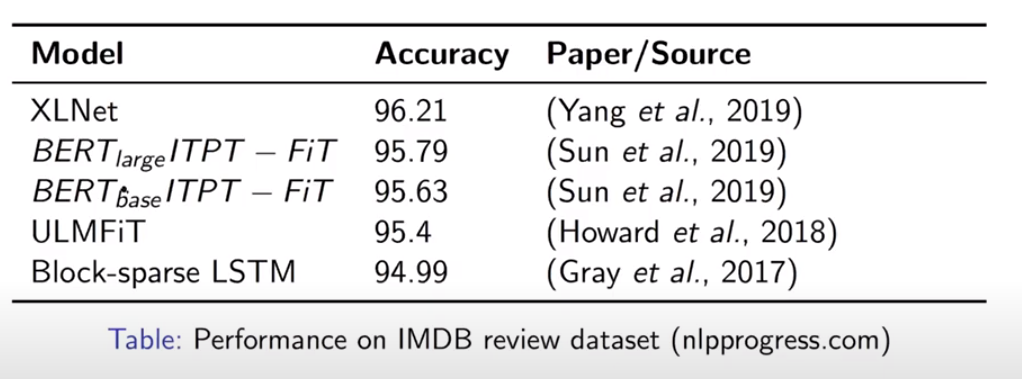

#### **With TFTrainer Class**

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer, TFTrainer, TFTrainingArguments

import tensorflow as tf
import tensorflow_dataset as 


model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


# training_args = TFTrainingArguments(
#     output_dir='./results',          # output directory
#     num_train_epochs=3,              # total # of training epochs
#     per_device_train_batch_size=16,  # batch size per device during training
#     per_device_eval_batch_size=64,   # batch size for evaluation
#     warmup_steps=500,                # number of warmup steps for learning rate scheduler
#     weight_decay=0.01,               # strength of weight decay
#     logging_dir='./logs',            # directory for storing logs
# )




# trainer = TFTrainer(
#     model=model,                         # the instantiated 🤗 Transformers model to be trained
#     args=training_args,                  # training arguments, defined above
#     train_dataset=tfds_train_dataset,    # tensorflow_datasets training dataset
#     eval_dataset=tfds_test_dataset       # tensorflow_datasets evaluation dataset
# )


## **Use Cases**

1. Can be used to replace the current lstms models in many other applications.
2. 
3. 

# **References**


1. Illustrated Bert: http://jalammar.github.io/illustrated-bert/
http://jalammar.github.io/illustrated-bert/
2. Illustrated Transformer: https://jalammar.github.io/illustrated-transformer/
3. Visualizing Neural Machine Translation: https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/
4. Łukasz Kaiser's talk: https://www.youtube.com/watch?v=rBCqOTEfxvg&t=2249s
5. Masking in Transformers’ self-attention mechanism: https://medium.com/analytics-vidhya/masking-in-transformers-self-attention-mechanism-bad3c9ec235c
6. Understanding Encoder-Decoder Sequence to Sequence Model: https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346
7. Transformer: A Novel Neural Network Architecture for Language Understanding: https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html
8. The Annotated Transformer: https://nlp.seas.harvard.edu/2018/04/03/attention.html#encoder-and-decoder-stacks
9. A Visual Guide to Using BERT: http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
